In [2]:
import pynmea2
import pandas as pd
import geopandas as gpd

nmea_data = open("gps_data_20220215-070028.nmea", "rb")

coordinates_data = []

for message_bytes in nmea_data.readlines():    
    try:
        message = message_bytes.decode("utf-8").replace("\n", "").replace("\r", "")
        parsed_message = pynmea2.parse(message)
    except:
        # skip invalid sentences
        continue

    cga_data = {}
    # process only GGA messages
    if parsed_message.sentence_type == "GGA":
        for attr in ["timestamp", "latitude", "longitude", "latitude", "horizontal_dil", "num_sats", "gps_qual"]:
            cga_data[attr] = getattr(parsed_message, attr)
        coordinates_data.append(cga_data)
        

In [3]:
df = pd.DataFrame(coordinates_data)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude, crs="EPSG:4326"))
print(gdf)

          timestamp   latitude   longitude horizontal_dil num_sats  gps_qual  \
0    06:46:55+00:00 -34.048630  151.023756           0.62       12         1   
1    06:46:56+00:00 -34.048630  151.023757           0.62       12         1   
2    06:46:57+00:00 -34.048623  151.023758           0.62       12         1   
3    06:46:58+00:00 -34.048609  151.023757           0.61       12         1   
4    06:46:59+00:00 -34.048588  151.023755           0.62       12         1   
..              ...        ...         ...            ...      ...       ...   
809  07:00:24+00:00 -34.047688  151.022902           0.66       12         1   
810  07:00:25+00:00 -34.047663  151.023005           0.66       12         1   
811  07:00:26+00:00 -34.047636  151.023108           0.66       12         1   
812  07:00:27+00:00 -34.047610  151.023211           0.66       12         1   
813  07:00:28+00:00 -34.047583  151.023318           0.66       12         1   

                        geometry  
0   

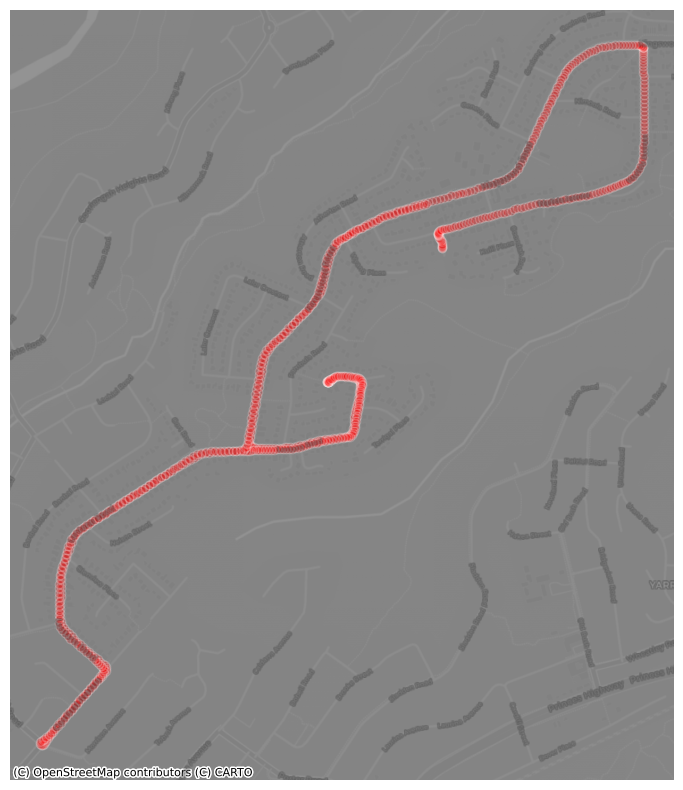

In [11]:
import matplotlib.pyplot as plt
import contextily as ctx

fig = plt.figure(figsize=(10,10))
ax = plt.axes()
gdf[gdf.gps_qual > 0].plot(ax=ax, alpha=.2, edgecolor="#ffff", color='red')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatterNoLabels, crs="EPSG:4326", alpha=.5)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatterOnlyLabels, crs="EPSG:4326", alpha=.5)
ax.set_axis_off()


In [15]:
import folium

m = folium.Map(location=(-22.9140008, -43.563634))

m

In [27]:


import folium, googlemaps, time
from folium.plugins import HeatMap, MarkerCluster, HeatMapWithTime

coord_list = []

coord_list = [[lat, lon] for lat, lon in zip(gdf['latitude'], gdf['longitude'])]

#print(coord_list)

mapa = folium.Map(location= coord_list[0], zoom_start= 13)
marker = MarkerCluster().add_to(mapa)

MarkerCluster(locations=coord_list).add_to(mapa)
mapa

In [31]:
map_calor = folium.Map(location=coord_list[0], zoom_start=11)
HeatMap(coord_list, radius= 30).add_to(map_calor)
map_calor